# 배추 객체 추출 관련 이미지 프로세싱 정리

## YoloV4를 활용한 배추 객체 영역 추출

In [3]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image

import time
import os

from pyaidoop.models.yolo.inference import YoloDetect
import pyaidoop.models.yolo.utils as utils


input_image_path = "/home/jinwon/Documents/github/factory/packages/pyaidoop-r/object-tracker-python/examples/yolo-cabbage/samples/cabbage3.jpg"

yolo_detect = YoloDetect(
    "tf",
    "/home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/examples/yolo-cabbage/yolov4-cusotm",
)

original_image = cv2.imread(input_image_path)

plt.imshow(original_image)
plt.title('Input Image')
plt.show()

yolo_result = yolo_detect.detect_object_by_data(original_image)
print(yolo_result)







ModuleNotFoundError: No module named 'easydict'

## 추출된 영역 확인

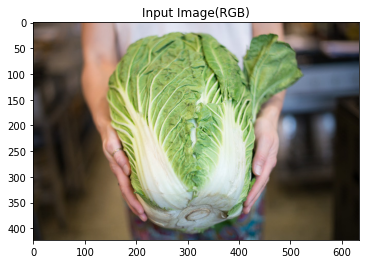

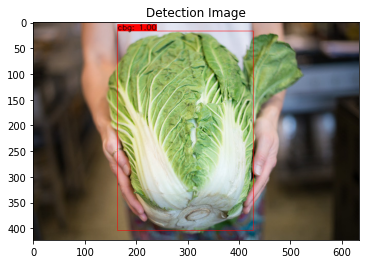

In [51]:
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)
plt.title('Input Image(RGB)')
plt.show()

original_cvt_image = original_image.copy()
result_display_image = utils.draw_bbox(original_cvt_image, yolo_result)
plt.imshow(result_display_image)
plt.title('Detection Image')
plt.show()

## Yolo에 대한 결과값 처리


In [52]:
out_boxes, out_scores, out_classes, num_boxes = yolo_result

In [53]:
print('num_boxes')
print(num_boxes)

num_boxes
[1]


In [61]:
print('out_boxes')
print(out_boxes)

out_boxes
[[[ 17. 164. 404. 428.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0

In [55]:
print('out_scores')
print(out_scores)

out_scores
[[0.9952387 0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.       ]]


In [56]:
print('out_classes')
print(out_classes)

out_classes
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


original image shape:
(423, 634, 3)
outboxes: 
[ 17. 164. 404. 428.]
[17, 164, 404, 428]


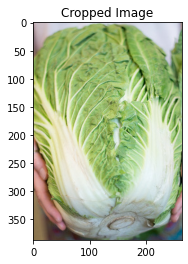

In [62]:
# check original image shape
print("original image shape:")
print(original_cvt_image.shape)
print("outboxes: ")
print(out_boxes[0][0])

# float list to integer list
roi_region = list(map(int, out_boxes[0][0]))
print(roi_region)

# create cropped image for cabbage object
cropped_image = original_image[roi_region[0]:roi_region[2], roi_region[1]:roi_region[3]]
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()


## Image processing for cabbage object

173.0


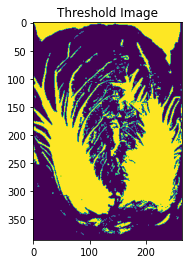

In [66]:
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
ret, thr_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_OTSU)
print(ret)

plt.imshow(thr_image)
plt.title('Threshold Image')
plt.show()

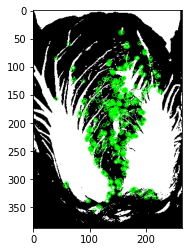

(<matplotlib.image.AxesImage at 0x7f177d4c8f28>, None)

In [74]:
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(thr_image,None)
# compute the descriptors with ORB
kp, des = orb.compute(thr_image, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(thr_image, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()